# Setup

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
date_filename = "2018-03-01_2018-03-31"

In [3]:
data = pd.read_csv("articles_" + date_filename + ".csv", index_col="id", \
                   parse_dates=["published", "discovered"])
data.head()

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,publisher_name,publisher_id,mins_as_lead,mins_on_front,num_articles_on_front,fb_brand_page,fb_brand_page_likes,fb_brand_page_time,alexa_rank,word_count
id,,,,,,,,,,,,,,,,,,,,
4296661b7ec493a798bf313f1133cd1176052f30,https://www.thetimes.co.uk/article/national-ge...,National Geographic Traveller reveals photo co...,2018-03-01 02:44:05.240,2018-03-01,4,0.032796,2018-03-01T23:14:09.837Z,0,1,3,The Times,thetimes_co_uk,0,1280,282.0,False,NaN,NaN,6435,NaN
a995ae644e9cbe39a5b4a41143466399751bdf5e,https://www.thetimes.co.uk/article/child-safet...,Child safety fears over director at charity fo...,2018-03-01 00:09:18.121,2018-03-01,4,0.032787,2018-03-01T13:33:06.906Z,0,1,3,The Times,thetimes_co_uk,0,1435,270.0,False,NaN,NaN,6435,125.0
5e8654da9845e74a797af5a1f8fa076b47c0b6f5,https://www.thetimes.co.uk/article/mosley-must...,Mosley must face up to his poisonous past,2018-03-01 00:09:10.933,2018-03-01,25,0.065574,2018-03-01T09:29:06.479Z,4,3,18,The Times,thetimes_co_uk,0,1435,270.0,False,NaN,NaN,6435,125.0
55c5ece98c02b70430bd19a2087558eaf0288f37,https://www.thetimes.co.uk/article/skive-off-s...,"Skive off school and enjoy sledging, says head...",2018-03-01 00:09:22.291,2018-03-01,67,0.163845,2018-03-01T08:28:11.729Z,17,37,13,The Times,thetimes_co_uk,0,1435,270.0,False,NaN,NaN,6435,125.0
19b8c2e31074fa50f06010b8f00a9899994baea1,https://www.thetimes.co.uk/article/pop-review-...,"Pop review: Yonaka at the Garage, N5",2018-03-01 17:05:18.708,2018-03-01,128,0.541427,2018-03-01T21:21:14.439Z,9,115,4,The Times,thetimes_co_uk,0,1855,332.0,False,NaN,NaN,6435,126.0


# Response Score

The response score is a number between 0 and 50 that indicates the level of response to an article.



Perhaps in the future we may choose to include other factors, but for now we just include engagements on Facebook. The maximum score of 50 should be achieved by an article that does really well compared with others.

In [4]:
pd.options.display.float_format = '{:.2f}'.format
data.fb_engagements.describe([0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999])

count    146484.00
mean       1519.93
std       15132.24
min           0.00
50%          25.00
75%         258.00
90%        1597.00
95%        4350.85
99%       27468.06
99.5%     51204.43
99.9%    164145.49
max     2915056.00
Name: fb_engagements, dtype: float64

There's 2 articles with more than 1 million engagements this month.

In [5]:
data[data.fb_engagements > 1000000]

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,publisher_name,publisher_id,mins_as_lead,mins_on_front,num_articles_on_front,fb_brand_page,fb_brand_page_likes,fb_brand_page_time,alexa_rank,word_count
id,,,,,,,,,,,,,,,,,,,,
b8a75ce80f2c523e6ba16bb3b6439bdf8c37b047,https://www.theguardian.com/science/2018/mar/1...,Stephen Hawking: modern cosmology's brightest ...,2018-03-14 03:49:11.754,2018-03-14 03:46:33,2915056,203793.62,2018-03-14T14:30:08.370Z,195155,2321470,398431,The Guardian,theguardian_com,519,1259,107.00,True,7925040.00,2018-03-14T03:49:46.000Z,142,2007.00
3a34a2b4590e487def08b1918783a5d8dd39f73a,http://www.bbc.co.uk/news/uk-43396008,Physicist Stephen Hawking dies aged 76,2018-03-14 03:49:13.874,2018-03-14 03:47:02,2016997,8610.41,2018-03-14T04:12:06.080Z,141418,1517206,358373,BBC,bbc_co_uk,545,1837,59.00,True,46116240.00,2018-03-14T03:50:08.000Z,96,66.00


In [6]:
data.fb_engagements.mode()

0    0
dtype: int64

*november* Going back to the enagement counts, we see the mean is 1,117, mode is zero, median is 24, 90th percentile is 1,453, 99th percentile is 21,166, 99.5th percentile is 33,982. The standard deviation is 8,083, significantly higher than the mean, so this is not a normal distribution. 

*december* Going back to the enagement counts, we see the mean is 1,106, mode is zero, median is 24, 90th percentile is 1,545, 99th percentile is 20,228, 99.5th percentile is 32,446. The standard deviation is 9,852, significantly higher than the mean, so this is not a normal distribution. 

*january 2018* Going back to the enagement counts, we see the mean is 1,108, mode is zero, median is 26, 90th percentile is 1,621, 99th percentile is 19,918, 99.5th percentile is 32,935. The standard deviation is 8,278, significantly higher than the mean, so this is not a normal distribution. 

*february 2018* Going back to the enagement counts, we see the mean is 1,237, mode is zero, median is 25, 90th percentile is 1,453, 99th percentile is 23,172, 99.5th percentile is 38,692. The standard deviation is 11,019, significantly higher than the mean, so this is not a normal distribution. 

*march 2018* Going back to the enagement counts, we see the mean is 1,519, mode is zero, median is 25, 90th percentile is 1,597, 99th percentile is 27,468, 99.5th percentile is 51,204. The standard deviation is 15,132, significantly higher than the mean, so this is not a normal distribution. 

Key publishers stats

In [7]:
data.groupby("publisher_id").agg({'url': 'count', 'fb_engagements': ['sum', 'median', 'mean']})

url fb_engagements                
                                  count            sum  median    mean
publisher_id                                                          
anotherangryvoice_blogspot_co_uk     38          78751 1665.50 2072.39
bbc_co_uk                         11963       11962778   35.00  999.98
breitbart_com                      2737        7662297  173.00 2799.52
brexitcentral_com                    66          36151  260.50  547.74
buzzfeed_com                       1452        4494915  177.50 3095.67
cnn_com                            4368       34823949  589.50 7972.52
dailymail_co_uk                   25800       16802567   19.00  651.26
economist_com                       579         170498   35.00  294.47
evolvepolitics_com                   82         342679 2473.50 4179.01
foxnews_com                        5340       21348445   98.00 3997.84
ft_com                             4913         362496    4.00   73.78
huffingtonpost_com                 2564       18008340  849.00 7023.53
independent_co_uk                  5590        4788850   28.00  856.68
indy100_com                         471         515637  101.00 1094.77
lemonde_fr                         4229        2780672   65.00  657.52
libdemvoice_org                     165           3072   11.00   18.62
mirror_co_uk                      10148        5902958   28.00  581.69
nbcnews_com                        2017       10900196  447.00 5404.16
newstatesman_com                    489          95347   23.00  194.98
npr_org                            1661       12637764  663.00 7608.53
nytimes_com                        5016       25629208  225.00 5109.49
order-order_com                     264          93065  170.50  352.52
propublica_org                       43          50915  341.00 1184.07
reuters_com                        6679        3915748   15.00  586.28
rt_com                             2322        2359592  353.00 1016.19
skwawkbox_org                       124         306273  278.50 2469.94
telegraph_co_uk                    4501        1448183   25.00  321.75
thecanary_co                        258         358003  453.50 1387.61
theguardian_com                    8409       13987337  124.00 1663.38
thetimes_co_uk                     9760         405336    1.00   41.53
washingtonpost_com                23764       19059313    0.00  802.02
westmonster_com                     255         292326   44.00 1146.38
yournewswire_com                    417        1022159   58.00 2451.22

In [8]:
mean = data.fb_engagements.mean()
median = data.fb_engagements.median()

non_zero_fb_enagagements = data.fb_engagements[data.fb_engagements > 0]

That's a bit better, but still way too clustered at the low end. Let's look at a log normal distribution.

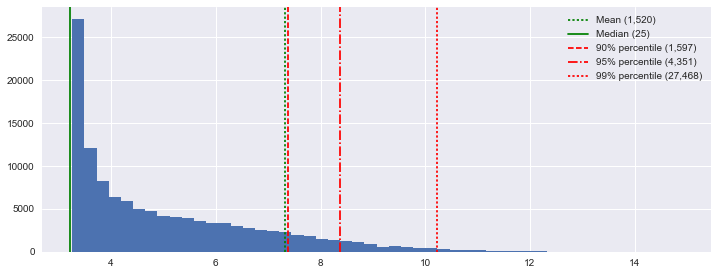

In [9]:
mean = data.fb_engagements.mean()
median = data.fb_engagements.median()
ninety = data.fb_engagements.quantile(.90)
ninetyfive = data.fb_engagements.quantile(.95)
ninetynine = data.fb_engagements.quantile(.99)

plt.figure(figsize=(12,4.5))
plt.hist(np.log(non_zero_fb_enagagements + median), bins=50)
plt.axvline(np.log(mean), linestyle=':', label=f'Mean ({mean:,.0f})', color='green')
plt.axvline(np.log(median), label=f'Median ({median:,.0f})', color='green')
plt.axvline(np.log(ninety), linestyle='--', label=f'90% percentile ({ninety:,.0f})', color='red')
plt.axvline(np.log(ninetyfive), linestyle='-.', label=f'95% percentile ({ninetyfive:,.0f})', color='red')
plt.axvline(np.log(ninetynine), linestyle=':', label=f'99% percentile ({ninetynine:,.0f})', color='red')
leg = plt.legend()


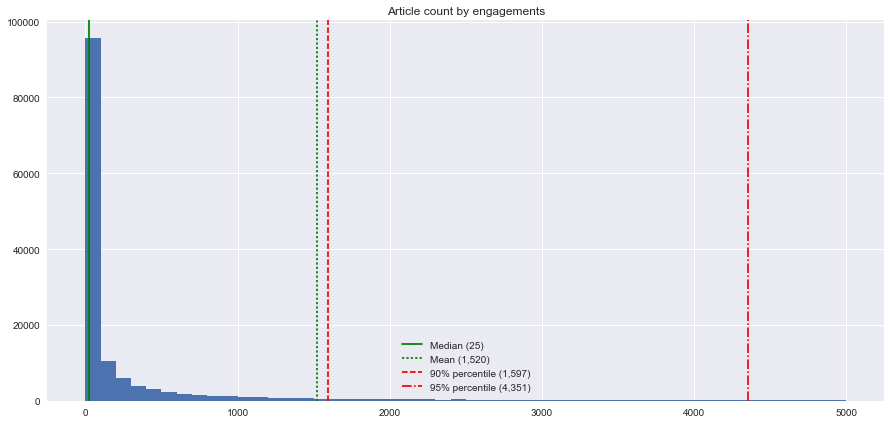

In [10]:
eng = data.fb_engagements[(data.fb_engagements < 5000)]
mean = data.fb_engagements.mean()
median = data.fb_engagements.median()
ninety = data.fb_engagements.quantile(.90)
ninetyfive = data.fb_engagements.quantile(.95)
ninetynine = data.fb_engagements.quantile(.99)

plt.figure(figsize=(15,7))
plt.hist(eng, bins=50)
plt.title("Article count by engagements")
plt.axvline(median, label=f'Median ({median:,.0f})', color='green')
plt.axvline(mean, linestyle=':', label=f'Mean ({mean:,.0f})', color='green')
plt.axvline(ninety, linestyle='--', label=f'90% percentile ({ninety:,.0f})', color='red')
plt.axvline(ninetyfive, linestyle='-.', label=f'95% percentile ({ninetyfive:,.0f})', color='red')
# plt.axvline(ninetynine, linestyle=':', label=f'99% percentile ({ninetynine:,.0f})', color='red')
leg = plt.legend()


In [11]:
log_engagements = (non_zero_fb_enagagements
                   .clip_upper(data.fb_engagements.quantile(.999))
                   .apply(lambda x: np.log(x + median))
                  )
log_engagements.describe()

count   119204.00
mean         5.03
std          1.80
min          3.26
25%          3.53
50%          4.42
75%          6.10
max         12.01
Name: fb_engagements, dtype: float64

Use standard feature scaling to bring that to a 1 to 50 range


In [12]:
def scale_log_engagements(engagements_logged):
    return np.ceil(
        50 * (engagements_logged - log_engagements.min()) / (log_engagements.max() - log_engagements.min())
    )

def scale_engagements(engagements):
    return scale_log_engagements(np.log(engagements + median))

scaled_non_zero_engagements = scale_log_engagements(log_engagements)
scaled_non_zero_engagements.describe()

count   119204.00
mean        10.61
std         10.29
min          0.00
25%          2.00
50%          7.00
75%         17.00
max         50.00
Name: fb_engagements, dtype: float64

In [13]:
# add in the zeros, as zero
scaled_engagements = pd.concat([scaled_non_zero_engagements, data.fb_engagements[data.fb_engagements == 0]])

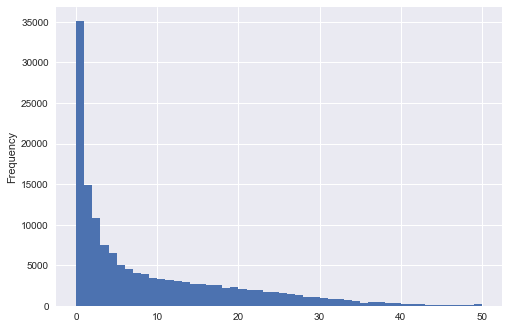

In [14]:
proposed = pd.DataFrame({"fb_engagements": data.fb_engagements, "response_score": scaled_engagements})
proposed.response_score.plot.hist(bins=50)

Looks good to me, lets save that.

In [15]:
data["response_score"] = proposed.response_score

### Proposal

The maximum of 50 points is awarded when the engagements are greater than the 99.9th percentile, rolling over the last month. 

i.e. where $limit$ is the 99.5th percentile of engagements calculated over the previous month, the response score for article $a$ is:

\begin{align}
basicScore_a & = 
\begin{cases} 
   0 & \text{if } engagements_a = 0 \\
   \log(\min(engagements_a,limit) + median(engagements))      & \text{if } engagements_a > 0
\end{cases} \\
responseScore_a & = 
\begin{cases} 
   0 & \text{if } engagements_a = 0 \\
   50 \cdot \frac{basicScore_a - \min(basicScore)}{\max(basicScore) - \min(basicScore)}       & \text{if } engagements_a > 0
\end{cases} \\
\\
\text{The latter equation can be expanded to:} \\
responseScore_a & = 
\begin{cases} 
   0 & \text{if } engagements_a = 0 \\
   50 \cdot 
   \frac{\log(\min(engagements_a,limit) + median(engagements)) - \log(1 + median(engagements))}
   {\log(limit + median(engagements)) - \log(1 + median(engagements))}       & \text{if } engagements_a > 0
\end{cases} \\
\end{align}

# Promotion Score

The aim of the promotion score is to indicate how important the article was to the publisher, by tracking where they chose to promote it. This is a number between 0 and 50 comprised of:

- 20 points based on whether the article was promoted as the "lead" story on the publisher's home page
- 15 points based on how long the article was promoted anywhere on the publisher's home page
- 15 points based on whether the article was promoted on the publisher's main facebook brand page

The first two should be scaled by the popularity/reach of the home page, for which we use the alexa page rank as a proxy.

The last should be scaled by the popularity/reach of the brand page, for which we use the number of likes the brand page has.

### Lead story (20 points)

In [16]:
data.mins_as_lead.describe([0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999])

count   146484.00
mean         9.15
std         90.17
min          0.00
50%          0.00
75%          0.00
90%          0.00
95%          0.00
99%        275.00
99.5%      579.00
99.9%     1174.65
max       7504.00
Name: mins_as_lead, dtype: float64

As expected, the vast majority of articles don't make it as lead. Let's explore how long typically publishers put something as lead for.

In [17]:
lead_articles = data[data.mins_as_lead > 0]

In [18]:
lead_articles.mins_as_lead.describe([0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999])

count   4086.00
mean     328.16
std      432.24
min        4.00
25%       84.00
50%      179.00
75%      433.50
90%      839.50
95%     1068.00
99%     1594.15
99.5%   1962.30
99.9%   5636.62
max     7504.00
Name: mins_as_lead, dtype: float64

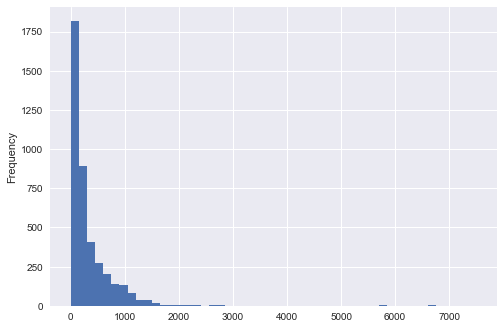

In [19]:
lead_articles.mins_as_lead.plot.hist(bins=50)

For lead, it's a  significant thing for an article to be lead at all, so although we want to penalise articles that were lead for a very short time, mostly we want to score the maximum even if it wasn't lead for ages. So we'll give maximum points when something has been lead for an hour.

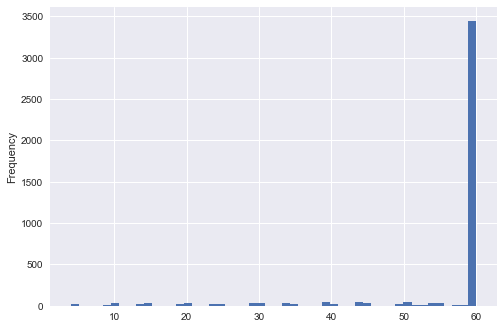

In [20]:
lead_articles.mins_as_lead.clip_upper(60).plot.hist(bins=50)

We also want to scale this by the alexa page rank, such that the maximum score of 20 points is for an article that was on the front for 4 hours for the most popular site.

So lets explore the alexa nunbers.

In [21]:
alexa_ranks = data.groupby(by="publisher_id").alexa_rank.mean().sort_values()
alexa_ranks

publisher_id
bbc_co_uk                               96
cnn_com                                105
nytimes_com                            120
theguardian_com                        142
buzzfeed_com                           147
dailymail_co_uk                        158
washingtonpost_com                     191
huffingtonpost_com                     215
foxnews_com                            285
rt_com                                 365
telegraph_co_uk                        370
independent_co_uk                      386
reuters_com                            497
npr_org                                594
lemonde_fr                             618
mirror_co_uk                           706
nbcnews_com                            826
breitbart_com                          994
ft_com                                1596
economist_com                         1825
indy100_com                           5014
thetimes_co_uk                        6435
newstatesman_com                     1276

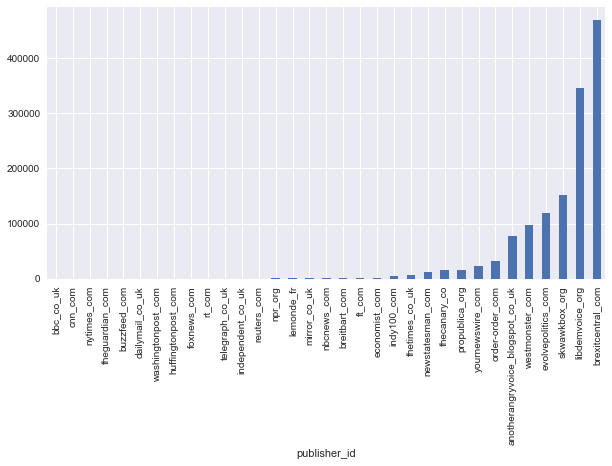

In [22]:
alexa_ranks.plot.bar(figsize=[10,5])

Let's try the simple option first: just divide the number of minutes as lead by the alexa rank. What's the scale of numbers we get then.

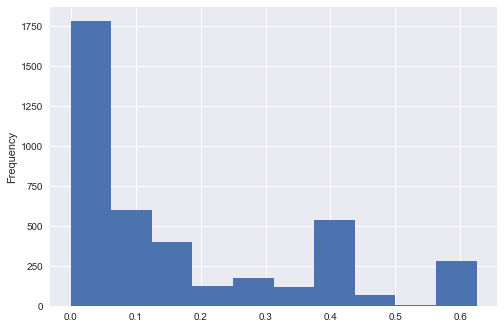

In [23]:
lead_proposal_1 = lead_articles.mins_as_lead.clip_upper(60) / lead_articles.alexa_rank
lead_proposal_1.plot.hist()

Looks like there's too much of a cluster around 0. Have we massively over penalised the publishers with a high alexa rank?

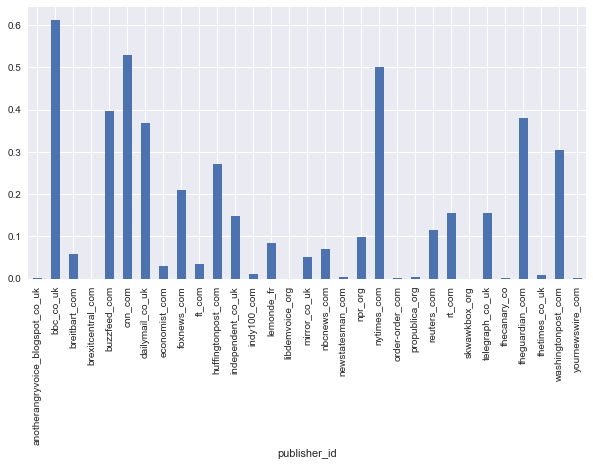

In [24]:
lead_proposal_1.groupby(data.publisher_id).mean().plot.bar(figsize=[10,5])

Yes. Let's try taking the log of the alexa rank and see if that looks better.

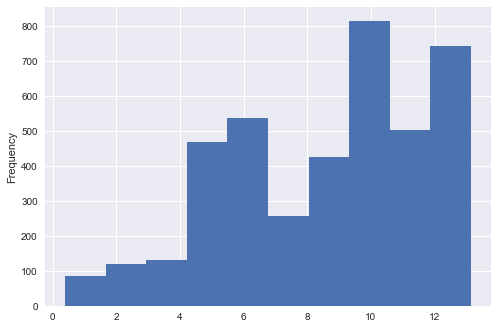

In [25]:
lead_proposal_2 = (lead_articles.mins_as_lead.clip_upper(60) / np.log(lead_articles.alexa_rank))
lead_proposal_2.plot.hist()

In [26]:
lead_proposal_2.groupby(data.publisher_id).describe()

,count,mean,std,min,25%,50%,75%,max
publisher_id,,,,,,,,
anotherangryvoice_blogspot_co_uk,38.00,5.33,0.00,5.33,5.33,5.33,5.33,5.33
bbc_co_uk,108.00,12.87,1.50,2.19,13.15,13.15,13.15,13.15
breitbart_com,213.00,8.35,1.34,0.72,8.69,8.69,8.69,8.69
brexitcentral_com,49.00,4.14,1.16,0.69,4.59,4.59,4.59,4.59
buzzfeed_com,314.00,11.69,1.36,1.80,12.02,12.02,12.02,12.02
cnn_com,210.00,11.94,2.64,0.86,12.89,12.89,12.89,12.89
dailymail_co_uk,150.00,11.47,1.62,0.99,11.85,11.85,11.85,11.85
economist_com,66.00,7.62,1.35,0.53,7.99,7.99,7.99,7.99
foxnews_com,101.00,10.54,0.79,2.65,10.61,10.61,10.61,10.61


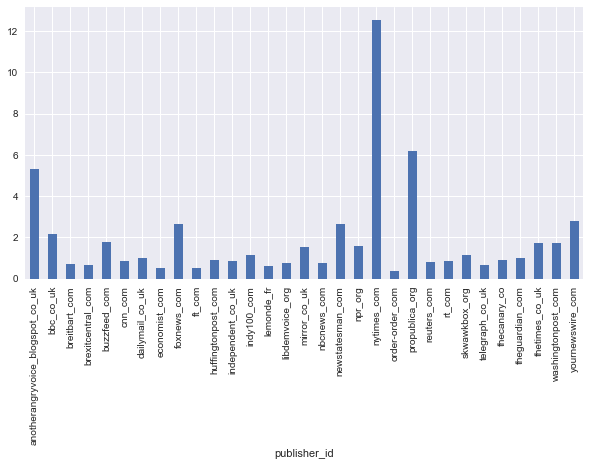

In [27]:
lead_proposal_2.groupby(data.publisher_id).min().plot.bar(figsize=[10,5])

That looks about right, as long as the smaller publishers were closer to zero. So let's apply feature scaling to this, to give a number between 1 and 20. (Anything not as lead will pass though as zero.)

In [28]:
def rescale(series):
    return (series - series.min()) / (series.max() - series.min())

lead_proposal_3 = np.ceil(20 * rescale(lead_proposal_2))

In [29]:
lead_proposal_2.min(), lead_proposal_2.max()

(0.38500569152790032, 13.145359968846892)

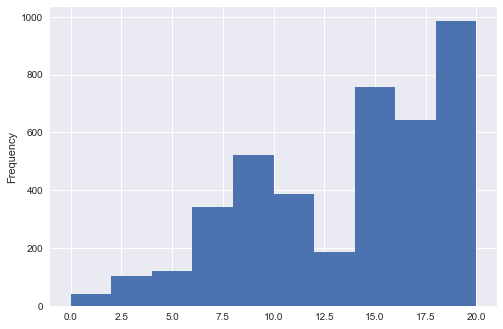

In [30]:
lead_proposal_3.plot.hist()

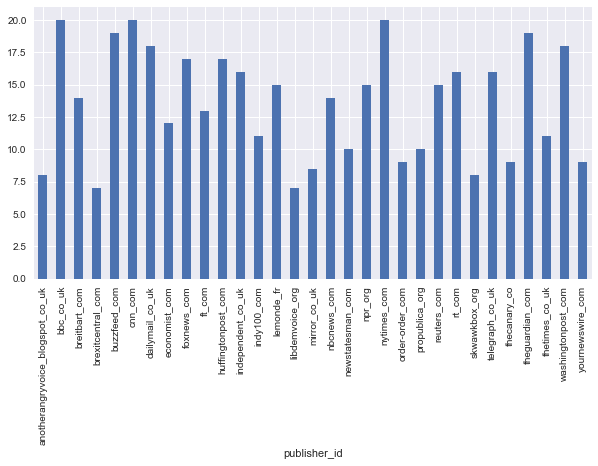

In [31]:
lead_proposal_3.groupby(data.publisher_id).median().plot.bar(figsize=[10,5])

In [32]:
data["lead_score"] = pd.concat([lead_proposal_3, data.mins_as_lead[data.mins_as_lead==0]])

In [33]:
data.lead_score.value_counts().sort_index()

0.00     142399
1.00         40
2.00         43
3.00         61
4.00         60
5.00         59
6.00         71
7.00        272
8.00        196
9.00        327
10.00       210
11.00       176
12.00        81
13.00       106
14.00       320
15.00       436
16.00       379
17.00       263
18.00       240
19.00       399
20.00       346
Name: lead_score, dtype: int64

In [34]:
data.lead_score.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk    8.00
bbc_co_uk                          20.00
breitbart_com                      14.00
brexitcentral_com                   7.00
buzzfeed_com                       19.00
cnn_com                            20.00
dailymail_co_uk                    18.00
economist_com                      12.00
evolvepolitics_com                  0.00
foxnews_com                        17.00
ft_com                             13.00
huffingtonpost_com                 17.00
independent_co_uk                  16.00
indy100_com                        11.00
lemonde_fr                         15.00
libdemvoice_org                     7.00
mirror_co_uk                       14.00
nbcnews_com                        14.00
newstatesman_com                   10.00
npr_org                            15.00
nytimes_com                        20.00
order-order_com                     9.00
propublica_org                     10.00
reuters_com                        15.00
rt_

In summary then, score for article $a$ is:


$$
unscaledLeadScore_a = \frac{\min(minsAsLead_a, 60)}{\log(alexaRank_a)}\\
leadScore_a = 19 \cdot 
\frac{unscaledLeadScore_a - \min(unscaledLeadScore)}
{\max(unscaledLeadScore) - \min(unscaledLeadScore)} 
+ 1
$$

Since the minium value of $minsAsLead$ is 1, $\min(unscaledLeadScore)$ is pretty insignificant. So we can simplify this to:

$$
leadScore_a = 20 \cdot 
\frac{unscaledLeadScore_a }
     {\max(unscaledLeadScore)} 
$$

or: 

$$
leadScore_a = 20 \cdot 
\frac{\frac{\min(minsAsLead_a, 60)}{\log(alexaRank_a)} }
     {\frac{60}{\log(\max(alexaRank))}} 
$$

$$
leadScore_a = \left( 20 \cdot 
\frac{\min(minsAsLead_a, 60)}{\log(alexaRank_a)} \cdot
     {\frac{\log(\max(alexaRank))}{60}} \right)
$$

## Time on front score (15 points)

This is similar to time as lead, so lets try doing the same calculation, except we also want to factor in the number of slots on the front:


$$frontScore_a = 
15 
\left(\frac{\min(minsOnFront_a, 1440)}{alexaRank_a \cdot numArticlesOnFront_a}\right) 
\left( \frac{\min(alexaRank \cdot numArticlesOnFront)}{1440} \right)$$

In [35]:
(data.alexa_rank * data.num_articles_on_front).min() / 1440

2.4500000000000002

In [36]:
time_on_front_proposal_1 = np.ceil(data.mins_on_front.clip_upper(1440) / (data.alexa_rank * data.num_articles_on_front) * (2.45) * 15)

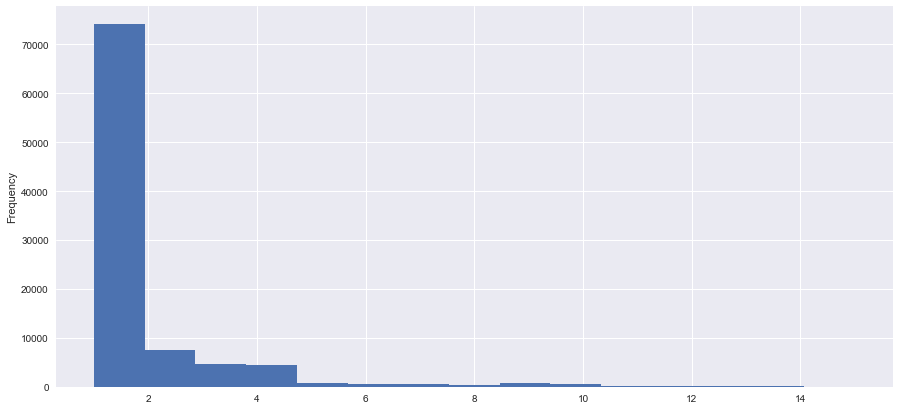

In [37]:
time_on_front_proposal_1.plot.hist(figsize=(15, 7), bins=15)

In [38]:
time_on_front_proposal_1.value_counts().sort_index()

1.00     74079
2.00      7491
3.00      4745
4.00      4502
5.00       829
6.00       667
7.00       534
8.00       437
9.00       867
10.00      493
11.00      242
12.00      148
13.00      100
14.00       87
15.00       18
dtype: int64

In [39]:
time_on_front_proposal_1.groupby(data.publisher_id).sum()

publisher_id
anotherangryvoice_blogspot_co_uk      38.00
bbc_co_uk                          14465.00
breitbart_com                       2641.00
brexitcentral_com                     66.00
buzzfeed_com                       10488.00
cnn_com                            12675.00
dailymail_co_uk                    14438.00
economist_com                        286.00
evolvepolitics_com                    79.00
foxnews_com                         6709.00
ft_com                              3187.00
huffingtonpost_com                  8335.00
independent_co_uk                   3902.00
indy100_com                          470.00
lemonde_fr                          4216.00
libdemvoice_org                      165.00
mirror_co_uk                        9635.00
nbcnews_com                         1801.00
newstatesman_com                     482.00
npr_org                             2919.00
nytimes_com                         9791.00
order-order_com                      263.00
propublica_org     

That looks good to me.

In [40]:
data["front_score"] = np.ceil(data.mins_on_front.clip_upper(1440) / (data.alexa_rank * data.num_articles_on_front) * (2.45) * 15).fillna(0)

In [41]:
data.front_score 

id
4296661b7ec493a798bf313f1133cd1176052f30   1.00
a995ae644e9cbe39a5b4a41143466399751bdf5e   1.00
5e8654da9845e74a797af5a1f8fa076b47c0b6f5   1.00
55c5ece98c02b70430bd19a2087558eaf0288f37   1.00
19b8c2e31074fa50f06010b8f00a9899994baea1   1.00
8fd307ee7359d9bc37ee1d0de1bdedf27c67aaec   1.00
e9e44511e90365c6806d5d21c442dec0e5ce2289   1.00
29df6d80a9f8a8691492021fbdb407bd873f7634   1.00
4f23bde73ab83522dfe7d326f92500acb4c57ede   1.00
a43485f058f904f73b53bcae2bd63b48def31851   1.00
1eba49de1ed24dd27c87cc7f7df88eea14b77ffb   1.00
74acd3f538a979ec306a0e23ab78376a2c02964d   1.00
7c256cc04797c8a828adcc7a60ae5ec4c97af7e1   1.00
0262e43862244464024660cd2cbbafb71a2cd279   1.00
fc3207065dc6daf733c243411a60553858ad57e4   1.00
b4b2a48f6570ecc54d037e20642fd1a72aee6d07   1.00
20b8b495a1f324efc7fcdf563ed7c500342bc0a6   1.00
8e5f315c408da033da14ca097efe1c1cf58f1e24   1.00
302848dc6974b2c1f8e3c13005490801c13fab01   1.00
ad63302360007ff4aaca5a3ca838e6b323c7f2e8   1.00
c50275a656ed2e45255f4f34074e7b431821c

## Facebook brand page promotion (15 points)

One way a publisher has of promoting content is to post to their brand page. The significance of doing so is stronger when the brand page has more followers (likes).

$$ facebookPromotionProposed1_a = 15 \left( \frac {brandPageLikes_a} {\max(brandPageLikes)} \right) $$

Now lets explore the data to see if that makes sense. **tr;dr the formula above is incorrect**

In [42]:
data.fb_brand_page_likes.max()

46501656.0

In [43]:
facebook_promotion_proposed_1 = np.ceil((15 * (data.fb_brand_page_likes / data.fb_brand_page_likes.max())).fillna(0))

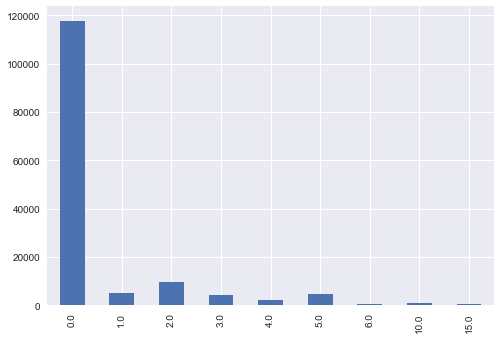

In [44]:
facebook_promotion_proposed_1.value_counts().sort_index().plot.bar()

In [45]:
facebook_promotion_proposed_1.groupby(data.publisher_id).describe()

,count,mean,std,min,25%,50%,75%,max
publisher_id,,,,,,,,
anotherangryvoice_blogspot_co_uk,38.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
bbc_co_uk,11963.00,0.52,2.75,0.00,0.00,0.00,0.00,15.00
breitbart_com,2737.00,0.78,0.98,0.00,0.00,0.00,2.00,2.00
brexitcentral_com,66.00,0.56,0.50,0.00,0.00,1.00,1.00,1.00
buzzfeed_com,1452.00,0.50,0.50,0.00,0.00,0.00,1.00,1.00
cnn_com,4368.00,2.54,4.36,0.00,0.00,0.00,10.00,10.00
dailymail_co_uk,25800.00,0.61,1.64,0.00,0.00,0.00,0.00,5.00
economist_com,579.00,2.50,1.12,0.00,3.00,3.00,3.00,3.00
evolvepolitics_com,82.00,0.94,0.24,0.00,1.00,1.00,1.00,1.00


That's too much variation: sites like the Guardian, which have a respectable 7.5m likes, should not be scoring a 3. Lets try applying a log to it, and then standard feature scaling again.

In [46]:
data.fb_brand_page_likes.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk     334591.00
bbc_co_uk                          46501656.00
breitbart_com                       3855739.00
brexitcentral_com                     16040.00
buzzfeed_com                        2941240.00
cnn_com                            30055121.00
dailymail_co_uk                    14651250.00
economist_com                       8528948.00
evolvepolitics_com                   128042.00
foxnews_com                        16377561.00
ft_com                              3776695.00
huffingtonpost_com                  9872568.00
independent_co_uk                   8204164.00
indy100_com                          243508.00
lemonde_fr                          4147802.00
libdemvoice_org                        8634.00
mirror_co_uk                        2987463.00
nbcnews_com                         9699612.00
newstatesman_com                     154653.00
npr_org                             6312234.00
nytimes_com                        15594031.00


In [47]:
np.log(2149)

7.6727578966425103

In [48]:
np.log(data.fb_brand_page_likes.groupby(data.publisher_id).max())

publisher_id
anotherangryvoice_blogspot_co_uk   12.72
bbc_co_uk                          17.65
breitbart_com                      15.17
brexitcentral_com                   9.68
buzzfeed_com                       14.89
cnn_com                            17.22
dailymail_co_uk                    16.50
economist_com                      15.96
evolvepolitics_com                 11.76
foxnews_com                        16.61
ft_com                             15.14
huffingtonpost_com                 16.11
independent_co_uk                  15.92
indy100_com                        12.40
lemonde_fr                         15.24
libdemvoice_org                     9.06
mirror_co_uk                       14.91
nbcnews_com                        16.09
newstatesman_com                   11.95
npr_org                            15.66
nytimes_com                        16.56
order-order_com                    10.73
propublica_org                     12.85
reuters_com                        15.20
rt_

That's more like it, but the lower numbers should be smaller.

In [49]:
np.log(data.fb_brand_page_likes.groupby(data.publisher_id).max() / 1000)

publisher_id
anotherangryvoice_blogspot_co_uk    5.81
bbc_co_uk                          10.75
breitbart_com                       8.26
brexitcentral_com                   2.78
buzzfeed_com                        7.99
cnn_com                            10.31
dailymail_co_uk                     9.59
economist_com                       9.05
evolvepolitics_com                  4.85
foxnews_com                         9.70
ft_com                              8.24
huffingtonpost_com                  9.20
independent_co_uk                   9.01
indy100_com                         5.50
lemonde_fr                          8.33
libdemvoice_org                     2.16
mirror_co_uk                        8.00
nbcnews_com                         9.18
newstatesman_com                    5.04
npr_org                             8.75
nytimes_com                         9.65
order-order_com                     3.82
propublica_org                      5.94
reuters_com                         8.29
rt_

In [50]:
scaled_fb_brand_page_likes = (data.fb_brand_page_likes / 1000)
facebook_promotion_proposed_2 = np.ceil(\
    (15 * \
     (np.log(scaled_fb_brand_page_likes) / np.log(scaled_fb_brand_page_likes.max()))\
    )\
                                       ).fillna(0)

In [51]:
facebook_promotion_proposed_2.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk    9.00
bbc_co_uk                          15.00
breitbart_com                      12.00
brexitcentral_com                   4.00
buzzfeed_com                       12.00
cnn_com                            15.00
dailymail_co_uk                    14.00
economist_com                      13.00
evolvepolitics_com                  7.00
foxnews_com                        14.00
ft_com                             12.00
huffingtonpost_com                 13.00
independent_co_uk                  13.00
indy100_com                         8.00
lemonde_fr                         12.00
libdemvoice_org                     4.00
mirror_co_uk                       12.00
nbcnews_com                        13.00
newstatesman_com                    8.00
npr_org                            13.00
nytimes_com                        14.00
order-order_com                     6.00
propublica_org                      9.00
reuters_com                        12.00
rt_

LGTM. So the equation is


$$ facebookPromotion_a = 15 \left( 
\frac {\log(\frac {brandPageLikes_a}{1000})} 
{\log(\frac {\max(brandPageLikes)}{1000}))} \right) $$


Now, let's try applying standard feature scaling approch to this, rather than using a magic number of 1,000. That equation would be:

\begin{align}
unscaledFacebookPromotion_a &= 
   \log(brandPageLikes_a) \\
facebookPromotion_a &= 
   15 \cdot \frac{unscaledFacebookPromotion_a - \min(unscaledFacebookPromotion)}{\max(unscaledFacebookPromotion) - \min(unscaledFacebookPromotion)}  \\
\\
\text{The scaling can be simplified to:} \\
facebookPromotion_a &= 
   15 \cdot \frac{unscaledFacebookPromotion_a - \log(\min(brandPageLikes))}{\log(\max(brandPageLikes)) - \log(\min(brandPageLikes))}  \\
\\
\text{Meaning the overall equation becomes:} \\
facebookPromotion_a &= 
   15 \cdot \frac{\log(brandPageLikes_a) - \log(\min(brandPageLikes))}{\log(\max(brandPageLikes)) - \log(\min(brandPageLikes))} 
   \end{align}


In [52]:
facebook_promotion_proposed_3 = np.ceil(
    (14 * 
     ( 
         (np.log(data.fb_brand_page_likes) - np.log(data.fb_brand_page_likes.min()) ) /
         (np.log(data.fb_brand_page_likes.max()) - np.log(data.fb_brand_page_likes.min()))
     )
    ) + 1
                                       )

In [53]:
facebook_promotion_proposed_3.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk    8.00
bbc_co_uk                          15.00
breitbart_com                      12.00
brexitcentral_com                   3.00
buzzfeed_com                       11.00
cnn_com                            15.00
dailymail_co_uk                    14.00
economist_com                      13.00
evolvepolitics_com                  6.00
foxnews_com                        14.00
ft_com                             11.00
huffingtonpost_com                 13.00
independent_co_uk                  13.00
indy100_com                         7.00
lemonde_fr                         12.00
libdemvoice_org                     2.00
mirror_co_uk                       11.00
nbcnews_com                        13.00
newstatesman_com                    6.00
npr_org                            12.00
nytimes_com                        14.00
order-order_com                     4.00
propublica_org                      8.00
reuters_com                        12.00
rt_

In [54]:
data["facebook_promotion_score"] = facebook_promotion_proposed_3.fillna(0.0)

# Review

In [55]:
data["promotion_score"] = (data.lead_score + data.front_score + data.facebook_promotion_score)
data["attention_index"] = (data.promotion_score + data.response_score)

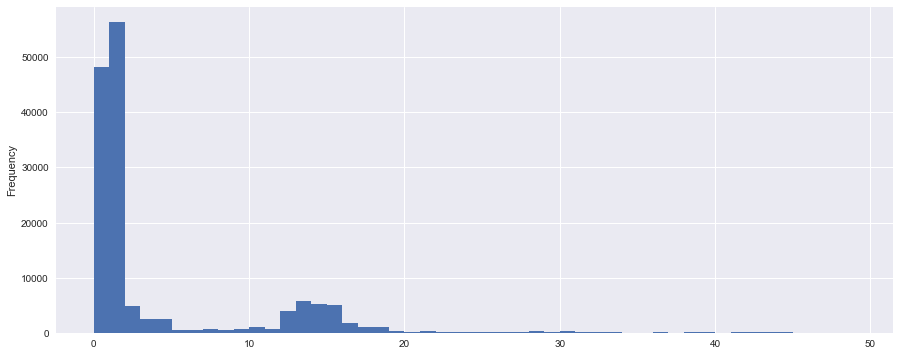

In [56]:
data.promotion_score.plot.hist(bins=np.arange(50), figsize=(15,6))

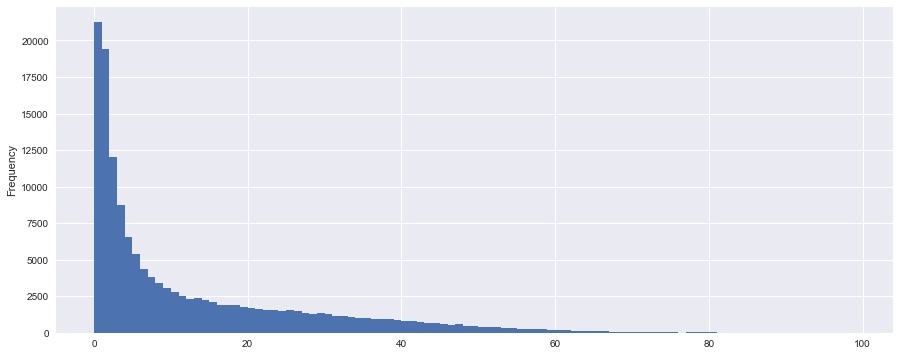

In [57]:
data.attention_index.plot.hist(bins=np.arange(100), figsize=(15,6))

In [58]:
data.attention_index.value_counts().sort_index()

0.00     21250
1.00     19394
2.00     12021
3.00      8741
4.00      6532
5.00      5408
6.00      4333
7.00      3791
8.00      3415
9.00      3065
10.00     2821
11.00     2518
12.00     2342
13.00     2350
14.00     2266
15.00     2083
16.00     1894
17.00     1902
18.00     1892
19.00     1765
20.00     1715
21.00     1635
22.00     1592
23.00     1578
24.00     1500
25.00     1551
26.00     1484
27.00     1382
28.00     1311
29.00     1324
         ...  
66.00      107
67.00       82
68.00       70
69.00       65
70.00       52
71.00       51
72.00       45
73.00       32
74.00       43
75.00       35
76.00       19
77.00       28
78.00       36
79.00       27
80.00       28
81.00       17
82.00       14
83.00       15
84.00        6
85.00       15
86.00        8
87.00        7
88.00       15
89.00        7
90.00        4
91.00        6
92.00        3
93.00        2
94.00        4
95.00        1
Name: attention_index, Length: 96, dtype: int64

In [59]:
# and lets see the articles with the biggest attention index
data.sort_values("attention_index", ascending=False)

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,...,fb_brand_page_likes,fb_brand_page_time,alexa_rank,word_count,response_score,lead_score,front_score,facebook_promotion_score,promotion_score,attention_index
id,,,,,,,,,,,,,,,,,,,,,
3a34a2b4590e487def08b1918783a5d8dd39f73a,http://www.bbc.co.uk/news/uk-43396008,Physicist Stephen Hawking dies aged 76,2018-03-14 03:49:13.874,2018-03-14 03:47:02.000,2016997,8610.41,2018-03-14T04:12:06.080Z,141418,1517206,358373,...,46116240.00,2018-03-14T03:50:08.000Z,96,66.00,50.00,20.00,10.00,15.00,45.00,95.00
e7607247fffe2d26b41a40d3e538ca6aa3713c6a,https://www.cnn.com/2018/03/25/us/emma-gonzale...,Emma Gonzalez profile: What you need to know a...,2018-03-25 13:04:19.014,2018-03-25 12:56:50.000,233961,787.19,2018-03-25T15:48:12.330Z,29785,189759,14417,...,29898261.00,2018-03-25T15:30:01.000Z,105,851.00,50.00,20.00,9.00,15.00,44.00,94.00
424489ba1c79b4b8d4da2e45f7fd358322947ebc,https://www.cnn.com/2018/03/21/us/austin-explo...,Austin bomber's motive is to cause 'mayhem and...,2018-03-21 06:10:16.915,2018-03-21 06:06:52.000,167127,381.36,2018-03-21T13:15:12.369Z,39679,99918,27530,...,29873177.00,2018-03-22T00:03:09.000Z,105,688.00,50.00,20.00,9.00,15.00,44.00,94.00
0fd72776c86f7d09898cb4f9e59b79d589127ae8,https://www.cnn.com/2018/03/31/politics/nra-me...,Ted Nugent calls Parkland survivors 'liars' an...,2018-03-31 23:34:16.919,2018-03-31 23:30:04.000,149760,251.02,2018-04-01T00:57:05.961Z,60523,78564,10673,...,29918466.00,2018-04-01T00:21:12.000Z,105,567.00,50.00,20.00,9.00,15.00,44.00,94.00
8d4daa22650daac24f1278a5e31c1f7204f47380,https://www.cnn.com/2018/03/20/us/maryland-sch...,Lone resource officer's quick action stopped t...,2018-03-20 19:19:19.249,2018-03-20 19:14:25.000,233418,1128.83,2018-03-21T13:08:07.973Z,41196,169456,22766,...,29865951.00,2018-03-20T22:30:14.000Z,105,694.00,50.00,20.00,9.00,15.00,44.00,94.00
7664d105c1e404927d190c8ef9106192165226d0,https://www.cnn.com/2018/03/16/politics/andrew...,Ex-FBI deputy director Andrew McCabe fired,2018-03-17 02:09:08.055,2018-03-17 02:00:06.000,289576,1156.07,2018-03-17T03:14:08.419Z,100382,162935,26259,...,29844606.00,2018-03-17T02:08:52.000Z,105,113.00,50.00,20.00,8.00,15.00,43.00,93.00
8848efde83e686020d400bbc7505803567b9331c,http://www.bbc.co.uk/news/world-europe-43525267,French police 'hero' dies of wounds,2018-03-24 05:13:12.232,2018-03-24 05:10:28.000,113294,285.37,2018-03-24T08:40:11.781Z,10422,91883,10989,...,46201300.00,2018-03-24T08:30:01.000Z,96,83.00,48.00,20.00,10.00,15.00,45.00,93.00
0705ea630bb0def04ffcbe69420b63a500879d43,http://www.bbc.co.uk/news/world-europe-43324406,International Women's Day: Trains cancelled as...,2018-03-08 03:25:11.956,2018-03-08 03:22:33.000,91511,237.61,2018-03-08T17:58:06.745Z,3914,78771,8826,...,46026903.00,2018-03-08T17:40:00.000Z,96,289.00,47.00,20.00,10.00,15.00,45.00,92.00
2e5fa0c72c95854d8fec1ad919caef746a97894e,https://www.cnn.com/2018/03/16/politics/tennes...,Resolution denouncing white supremacists and n...,2018-03-16 15:10:20.763,2018-03-16 15:07:46.000,113404,380.13,2018-03-17T15:08:09.009Z,23082,69399,20923,...,29843740.00,2018-03-16T16:31:06.000Z,105,398.00,48.00,20.00,9.00,15.00,44.00,92.00


In [60]:
data["score_diff"] = data.promotion_score - data.response_score

In [61]:
# promoted but low response
data.sort_values("score_diff", ascending=False).head(25)

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,...,fb_brand_page_time,alexa_rank,word_count,response_score,lead_score,front_score,facebook_promotion_score,promotion_score,attention_index,score_diff
id,,,,,,,,,,,,,,,,,,,,,
42d519353c1ffa2303ad54ba8f6afe6ce0ed7b8f,https://www.buzzfeed.com/albertsamaha/good-guy...,She Thought She’d Shot A Burglar. Then She Rea...,2018-03-23 11:31:19.815,2018-03-22 11:28:05,0,0.00,2018-03-23T11:42:14.365Z,0,0,0,...,2018-03-23T14:22:09.000Z,147,3003.00,0.00,19.00,14.00,11.00,44.00,44.00,44.00
512f3efdc422623da2139c574ddf9cf485f813fc,https://www.buzzfeed.com/charliewarzel/the-mou...,The Mountain West Is Experiencing A Second Gol...,2018-03-12 00:19:22.840,2018-03-07 16:18:51,1,0.09,2018-03-12T00:31:05.739Z,0,0,1,...,2018-03-12T05:04:02.000Z,147,3252.00,0.00,19.00,13.00,11.00,43.00,43.00,43.00
719512ac4c86426735c50c9773d2294fef708519,http://www.bbc.co.uk/news/world-europe-43552165,Putin: Mall fire was criminal negligence,2018-03-27 06:04:19.988,2018-03-26 01:50:59,8,0.64,2018-03-27T06:16:05.655Z,0,0,8,...,2018-03-27T07:44:41.000Z,96,707.00,2.00,20.00,9.00,15.00,44.00,46.00,42.00
5f76f987898ae0564ad528783cc4cb4a18369676,https://www.buzzfeed.com/borzoudaragahi/baghda...,"After 15 Years Of War, Baghdad's Night Life Is...",2018-05-05 16:19:11.986,2018-03-30 13:39:53,0,0.00,2018-05-05T16:31:10.611Z,0,0,0,...,2018-05-06T20:04:46.000Z,147,909.00,0.00,19.00,12.00,11.00,42.00,42.00,42.00
737c0b787113751672e74a807bb490576e2cf943,https://www.buzzfeed.com/louispeitzman/theater...,Theater Professionals Say Eliminating Sexual H...,2018-03-31 13:19:09.974,2018-03-29 20:27:00,5,0.40,2018-03-31T13:30:07.064Z,0,0,5,...,2018-03-31T15:11:47.000Z,147,3656.00,1.00,19.00,13.00,11.00,43.00,44.00,42.00
515df476d5cfcd80af00d8a9cf6b9530a8def2a7,http://www.bbc.co.uk/news/live/entertainment-a...,Oscars 2018,2018-03-02 19:25:13.001,2018-03-02 19:22:31,0,0.00,2018-03-03T11:51:08.649Z,0,0,0,...,2018-03-05T01:22:58.000Z,96,nan,0.00,20.00,6.00,15.00,41.00,41.00,41.00
044f712902ec6bc040d61e1e0b621c18dfe8b5ef,https://www.buzzfeed.com/nidhisubbaraman/faceb...,"Here’s How A Cabbage Juice “Cult” With 58,000 ...",2018-03-17 13:44:15.842,2018-03-15 20:27:43,6,0.46,2018-03-17T13:56:02.749Z,0,2,4,...,2018-03-17T18:36:18.000Z,147,4576.00,2.00,19.00,13.00,11.00,43.00,45.00,41.00
e44ea39a4c91c5d841a7ccf22e197ba1dd941010,https://www.buzzfeed.com/kendalltaggart/secret...,Secret NYPD Files: Hundreds Of Officers Commit...,2018-03-05 11:01:26.053,2018-03-02 19:27:57,4,0.28,2018-03-05T11:13:08.100Z,0,2,2,...,2018-03-05T11:00:19.000Z,147,4197.00,1.00,19.00,12.00,11.00,42.00,43.00,41.00
bbcec1194a52059beffa7f0170bf6fbb8c7c0742,https://www.buzzfeed.com/lamvo/oscars-script-d...,We Compared Several Years Of Oscars Best Pictu...,2018-03-03 00:13:18.340,2018-03-02 23:10:08,11,0.07,2018-03-03T05:30:11.035Z,0,0,11,...,2018-03-04T18:13:00.000Z,147,1368.00,2.00,19.00,13.00,11.00,43.00,45.00,41.00


In [62]:
# high response but not promoted
data.sort_values("score_diff", ascending=True).head(25)

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,...,fb_brand_page_time,alexa_rank,word_count,response_score,lead_score,front_score,facebook_promotion_score,promotion_score,attention_index,score_diff
id,,,,,,,,,,,,,,,,,,,,,
50274b99fd61c30213190e1f47e61c06b0fe8444,https://www.cnn.com/2018/03/24/us/naomi-wadler...,11-year-old speaks up for the black girls whos...,2018-03-24 17:58:21.797,2018-03-24 17:54:04.000,220229,229.14,2018-03-24T22:19:05.478Z,10005,189918,20306,...,NaN,105,400.00,50.00,0.00,0.00,0.00,0.00,50.00,-50.00
220bc1e5ff5023dabe5ff4aab0cf50d422d64a6d,https://www.nytimes.com/2018/03/13/us/ice-spok...,"ICE Spokesman Resigns, Saying He Could No Long...",2018-03-13 15:28:06.745,2018-03-13 15:26:00.000,490246,592.80,2018-03-13T17:12:05.255Z,43354,363565,83327,...,NaN,120,659.00,50.00,0.00,0.00,0.00,0.00,50.00,-50.00
5217dabb2788a25fb6ab6cf6903a5a565fbfdd3b,https://www.cnn.com/2018/03/14/us/nikolas-cruz...,Nikolas Cruz: Not guilty plea entered on Parkl...,2018-03-14 18:16:14.627,2018-03-14 18:10:07.000,319745,312.88,2018-03-17T13:07:04.378Z,106801,141537,71407,...,NaN,105,327.00,50.00,0.00,0.00,0.00,0.00,50.00,-50.00
665b158f2d4382c825e9c95181e19a880d0ea444,https://www.huffingtonpost.com/entry/man-award...,Innocent Man Awarded $1 Million After Spending...,2018-03-22 23:04:19.286,2018-03-22 22:45:08.830,166773,224.08,2018-03-26T01:05:03.403Z,45996,99141,21636,...,NaN,215,666.00,50.00,0.00,0.00,0.00,0.00,50.00,-50.00
4e0f5018cbbd109c03fb7b5c2b115b6f83787461,http://www.foxnews.com/lifestyle/2018/03/01/ca...,"California has worst 'quality of life' in US, ...",2018-03-01 06:04:37.010,2018-03-01 05:50:40.000,158939,376.80,2018-03-02T04:07:09.673Z,46730,88830,23379,...,NaN,285,262.00,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
811b11341fd9cf3570bfc99a75c00d80380e741f,https://www.washingtonpost.com/news/morning-mi...,High school students are marching 50 miles to ...,2018-03-26 10:34:13.083,2018-03-26 10:28:00.000,228839,725.92,2018-03-27T13:03:05.545Z,19054,188846,20939,...,NaN,191,929.00,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
49c7c48264287c418b4f325a27cafa6f66f2c05c,https://www.nytimes.com/2018/03/14/us/politics...,Democrat’s Strong Performance in Pennsylvania ...,2018-03-14 09:49:14.808,2018-03-14 09:48:15.000,130754,396.00,2018-03-14T13:00:10.561Z,13571,109852,7331,...,NaN,120,839.00,49.00,0.00,0.00,0.00,0.00,49.00,-49.00
8fc7a94c76f872356ed483b7ac17adac5512eeaf,http://www.dailymail.co.uk/health/article-5559...,NHS BANS over-the-counter remedies on prescrip...,2018-03-29 15:31:23.764,2018-03-29 15:30:11.000,192930,2579.73,2018-03-29T21:07:11.238Z,50619,113504,28807,...,NaN,158,844.00,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
3cefbaccf74c67435f2d9e3ce03a833a6a031dd9,http://www.foxnews.com/politics/2018/03/16/for...,Former FBI Deputy Director Andrew McCabe fired,2018-03-17 02:09:08.956,2018-03-17 02:05:10.000,153446,723.92,2018-03-17T02:31:08.779Z,34418,101832,17196,...,NaN,285,63.00,50.00,0.00,1.00,0.00,1.00,51.00,-49.00


Write that data to a file. Note that the scores here are provisional for two reasons:
1. they should be using a rolling-month based on the article publication date to calculate medians/min/max etc, whereas in this workbook we as just using values for the month of May
2. for analysis, we've rounded the numbers; we don't expect to do that for the actual scores

In [ ]:
data.to_csv("articles_with_provisional_scores_" + date_filename + ".csv")

# Summary

The attention index of an article is comprised of four components:

- *lead score* (max 20 points) based on how long an article was the lead story on the publisher's home page, scaled by the traffic to that publisher
- *front score* (max 15 points) based on how long an article was present on the publisher's home page, scaled by traffic to that publisher
- *Facebook promotion score* (max 15 points) based on whether the article was promoted to the publisher's Facebook brand page, scaled by the reach of that brand page
- *response score* (max 50 points) based on the number of Facebook engagements the article received, relative to other articles

Or, in other words:

\begin{align}
attentionIndex_a &= leadScore_a + frontScore_a + facebookPromotionScore_a + responseScore_a \\
leadScore_a &= 20 \cdot \left(\frac{\min(minsAsLead_a, 60)}{alexaRank_a}\right) \cdot \left( \frac{\min(alexaRank)}{60} \right) \\
frontScore_a &= 
15 \cdot
\left(\frac{\min(minsOnFront_a, 1440)}{alexaRank_a \cdot numArticlesOnFront_a}\right) \cdot
\left( \frac{\min(alexaRank \cdot numArticlesOnFront)}{1440} \right) \\
facebookPromotion_a &= 
\begin{cases}
 0 \text{ if not shared on brand page }\\
   15 \cdot \frac{\log(brandPageLikes_a) - \log(\min(brandPageLikes))}{\log(\max(brandPageLikes)) - \log(\min(brandPageLikes))}  \text{ otherwise }
\end{cases}   
\\
responseScore_a &= 
\begin{cases} 
   0 \text{ if } engagements_a = 0 \\
   50 \cdot 
   \frac{\log(\min(engagements_a,limit) + median(engagements)) - \log(1 + median(engagements))}
   {\log(limit + median(engagements)) - \log(1 + median(engagements))} \text{ if } engagements_a > 0
\end{cases} \\
\end{align} 